__Goal:__ is to estimate the future Petrol Price. To do this, please follow the following steps

### Import the libraries

In [94]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_pacf
from datetime import datetime

In [95]:
fuel = pd.read_excel('Weekly Fuel Prices.xlsx')

__Q1)__ Look at the information about the data? Prepare your data for exploring more as time series?-10 points

In [96]:
fuel.head()

,Date,Petrol (USD),Diesel (USD)
0,2003-06-09,74.590284,76.773394
1,2003-06-16,74.469143,76.689054
2,2003-06-23,74.423566,76.620546
3,2003-06-30,74.352421,76.505260
4,2003-07-07,74.283737,76.457376


In [97]:
fuel.tail()

,Date,Petrol (USD),Diesel (USD)
876,2020-03-23,119.644504,123.409485
877,2020-03-30,112.452709,118.597998
878,2020-04-06,110.234797,116.833354
879,2020-04-13,109.265819,116.150812
880,2020-04-20,108.632747,115.732573


In [98]:
fuel.describe()

,Petrol (USD),Diesel (USD)
count,881.000000,881.000000
mean,111.107355,115.614675
std,18.588151,19.715905
min,74.206577,76.408120
25%,95.306029,98.513787
50%,114.782386,118.597998
75%,127.924651,132.872053
max,142.172754,148.037710


In [99]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          881 non-null    datetime64[ns]
 1   Petrol (USD)  881 non-null    float64       
 2   Diesel (USD)  881 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 20.8 KB


In [100]:
fuel.isnull().sum()

Date            0
Petrol (USD)    0
Diesel (USD)    0
dtype: int64

In [101]:
prepare_data = fuel

prepare_data['Date'] = prepare_data['Date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))
prepare_data.head()


,Date,Petrol (USD),Diesel (USD)
0,2003-06-09,74.590284,76.773394
1,2003-06-16,74.469143,76.689054
2,2003-06-23,74.423566,76.620546
3,2003-06-30,74.352421,76.505260
4,2003-07-07,74.283737,76.457376


__Q2__ Compare the shape of your prepared dataframe? - 5 points

In [102]:
compare_result = prepare_data == fuel
compare_result

,Date,Petrol (USD),Diesel (USD)
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
876,True,True,True
877,True,True,True
878,True,True,True
879,True,True,True


__Q3__ Plot the columns of the dataframe with respect to the 'Date' -10 points

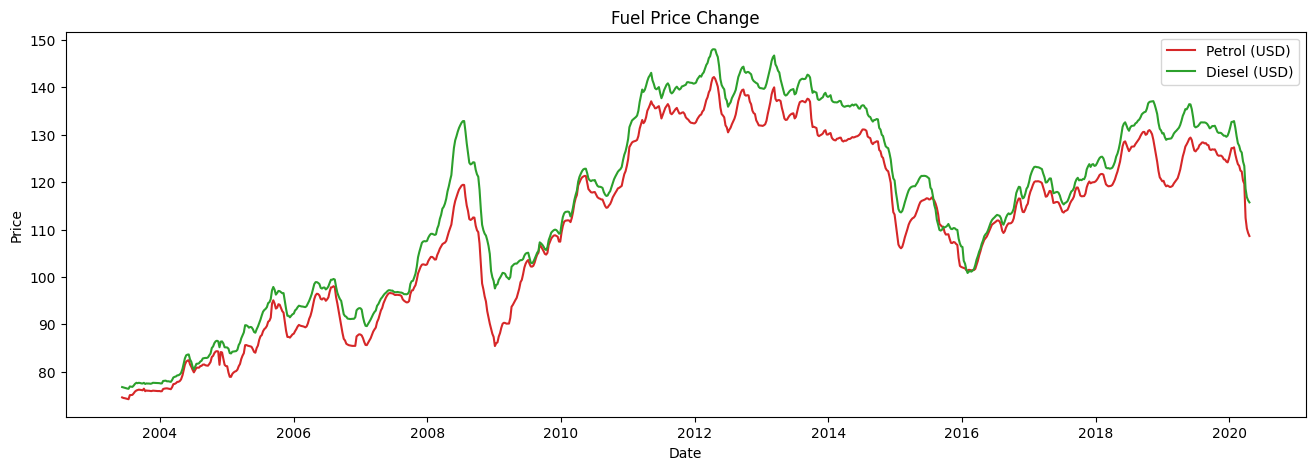

In [103]:
plt.figure(figsize=(16, 5), dpi=100)
plt.plot(prepare_data["Date"], prepare_data["Petrol (USD)"], color='tab:red', label="Petrol (USD)")
plt.plot(prepare_data["Date"], prepare_data["Diesel (USD)"], color='tab:green', label="Diesel (USD)")
plt.gca().set(title="Fuel Price Change", xlabel="Date", ylabel="Price")
plt.legend()
plt.show()

__Q4__ Decompose your data taking into account your purpose!: --5 points

* The correct choice of model (take period=7) --10 points

In [104]:
# evolution of "Petrol (USD)" versus "Diesel (USD)" in a 7-day period
period_dropN: int = 7

# define the target and predictors column
predictors = ['Petrol (USD)']
target = ['Diesel (USD)']

X = prepare_data[predictors][:-period_dropN]
y = prepare_data[target][:-period_dropN]

In [105]:
import statsmodels.api as sm_api

model = sm_api.OLS(y, X).fit()
# Score the model
prepare_data['predict'] = model.predict(prepare_data[predictors])
prepare_data

,Date,Petrol (USD),Diesel (USD),predict
0,2003-06-09,74.590284,76.773394,77.630990
1,2003-06-16,74.469143,76.689054,77.504910
2,2003-06-23,74.423566,76.620546,77.457475
3,2003-06-30,74.352421,76.505260,77.383430
4,2003-07-07,74.283737,76.457376,77.311946
...,...,...,...,...
876,2020-03-23,119.644504,123.409485,124.521865
877,2020-03-30,112.452709,118.597998,117.036893
878,2020-04-06,110.234797,116.833354,114.728567
879,2020-04-13,109.265819,116.150812,113.720088


__Q5__ Plot the seasonal component of the decomposed model? --5 points

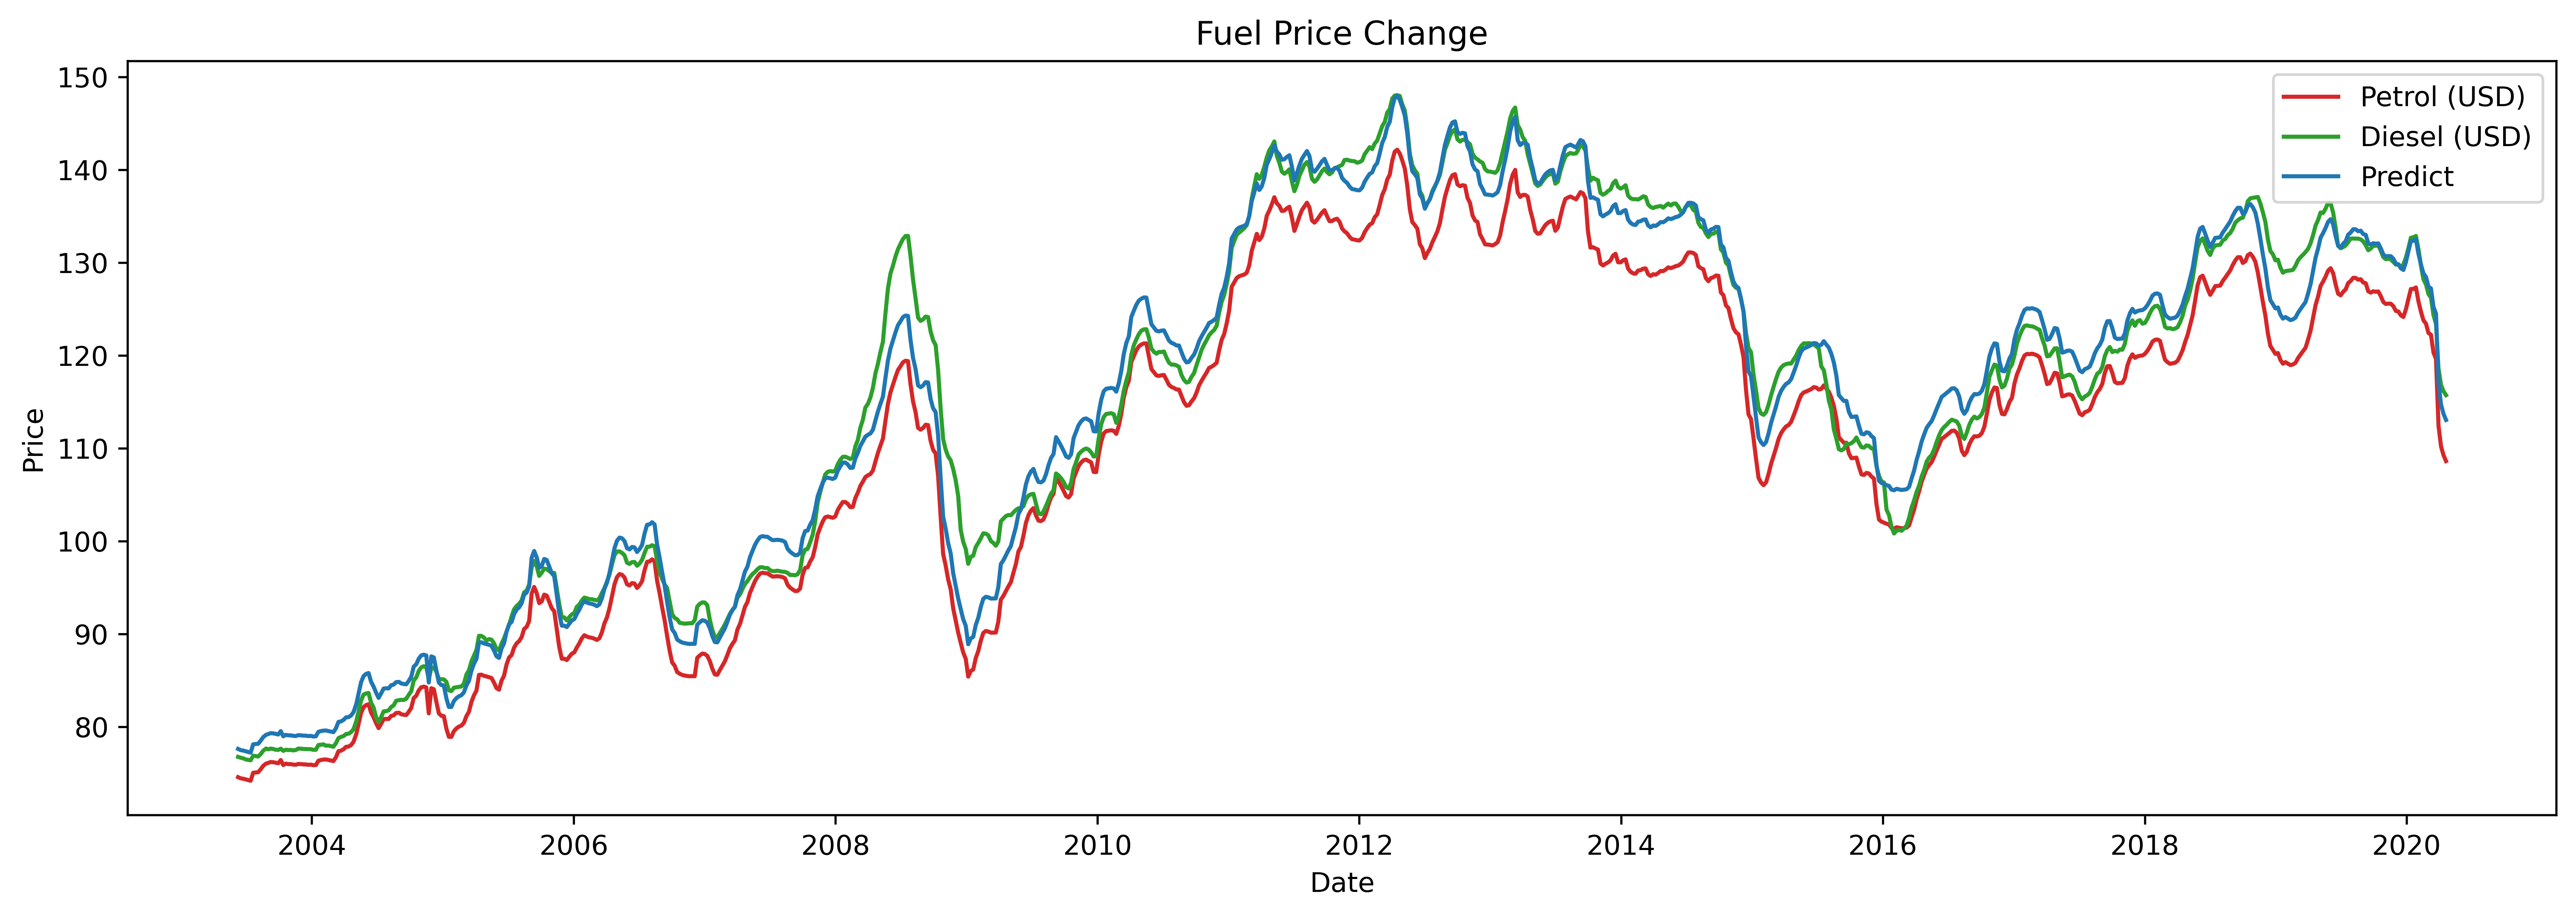

In [106]:
plt.figure(figsize=(16, 5), dpi=500)
plt.plot(prepare_data["Date"], prepare_data["Petrol (USD)"], color='tab:red', label="Petrol (USD)")
plt.plot(prepare_data["Date"], prepare_data["Diesel (USD)"], color='tab:green', label="Diesel (USD)")
plt.plot(prepare_data["Date"], prepare_data["predict"], color='tab:blue', label="Predict")
plt.gca().set(title="Fuel Price Change", xlabel="Date", ylabel="Price")
plt.legend()
plt.show()

__Interpretation:__  15 points(each 5)

1) What do you think about trendness of the data?    

   Ans: <b color="red">Uptrend</b>
   
2) What do you think about seasonality of the data? 

   Ans: <b color="red">Not Seasonality</b>

3) What about stationarity of the data? 

    Ans: <b color="red">Not Stationarity</b>

__Q6__ Plot Autocorrelation of the considered data! --5 points

/Users/commodore64/Desktop/YZM555/venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



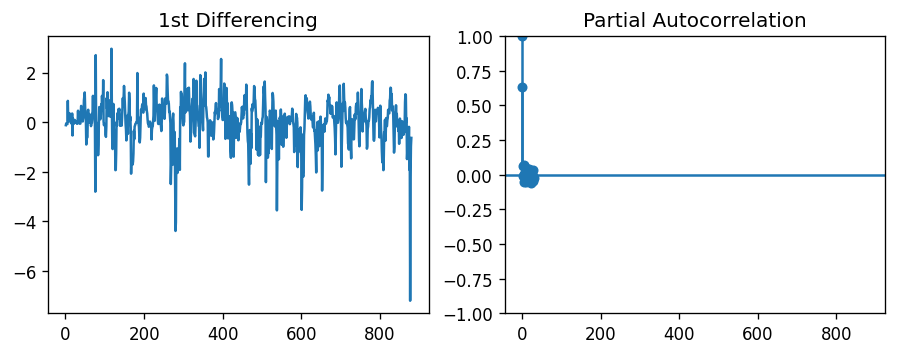

In [107]:
plt.rcParams.update({'figure.figsize': (9, 3), 'figure.dpi': 120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(prepare_data["Petrol (USD)"].diff());
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0, 5))
plot_pacf(prepare_data["Petrol (USD)"].diff().dropna(), ax=axes[1])

plt.show()

__Interpretation:__  Interpret the obtained figure. What can you say about the data?  (5 points)

<b color="red">An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of negative 1 represents a perfect negative correlation.</b>

__Q7__ Use the histograms to see the noise of the data? (5 points)

In [108]:
fig = px.histogram(prepare_data, x="Petrol (USD)", template='plotly_dark')
fig.show()

__Interpretation:__ Is it Noisy? Is it White Noise?  (10 points)

Ans:

<b color="red">Is the mean/level non-zero? : <b color="green">False</b>
Does the mean/level change over time? : <b color="green">True</b>
Does the variance change over time? : <b color="green">True</b>
Do values correlate with lag values?</b>: <b color="green">True</b>

WHITE NOISE = TRUE


__Q8__ To be more sure apply Augmented Dickey-Fuller test for the data? (5 points)

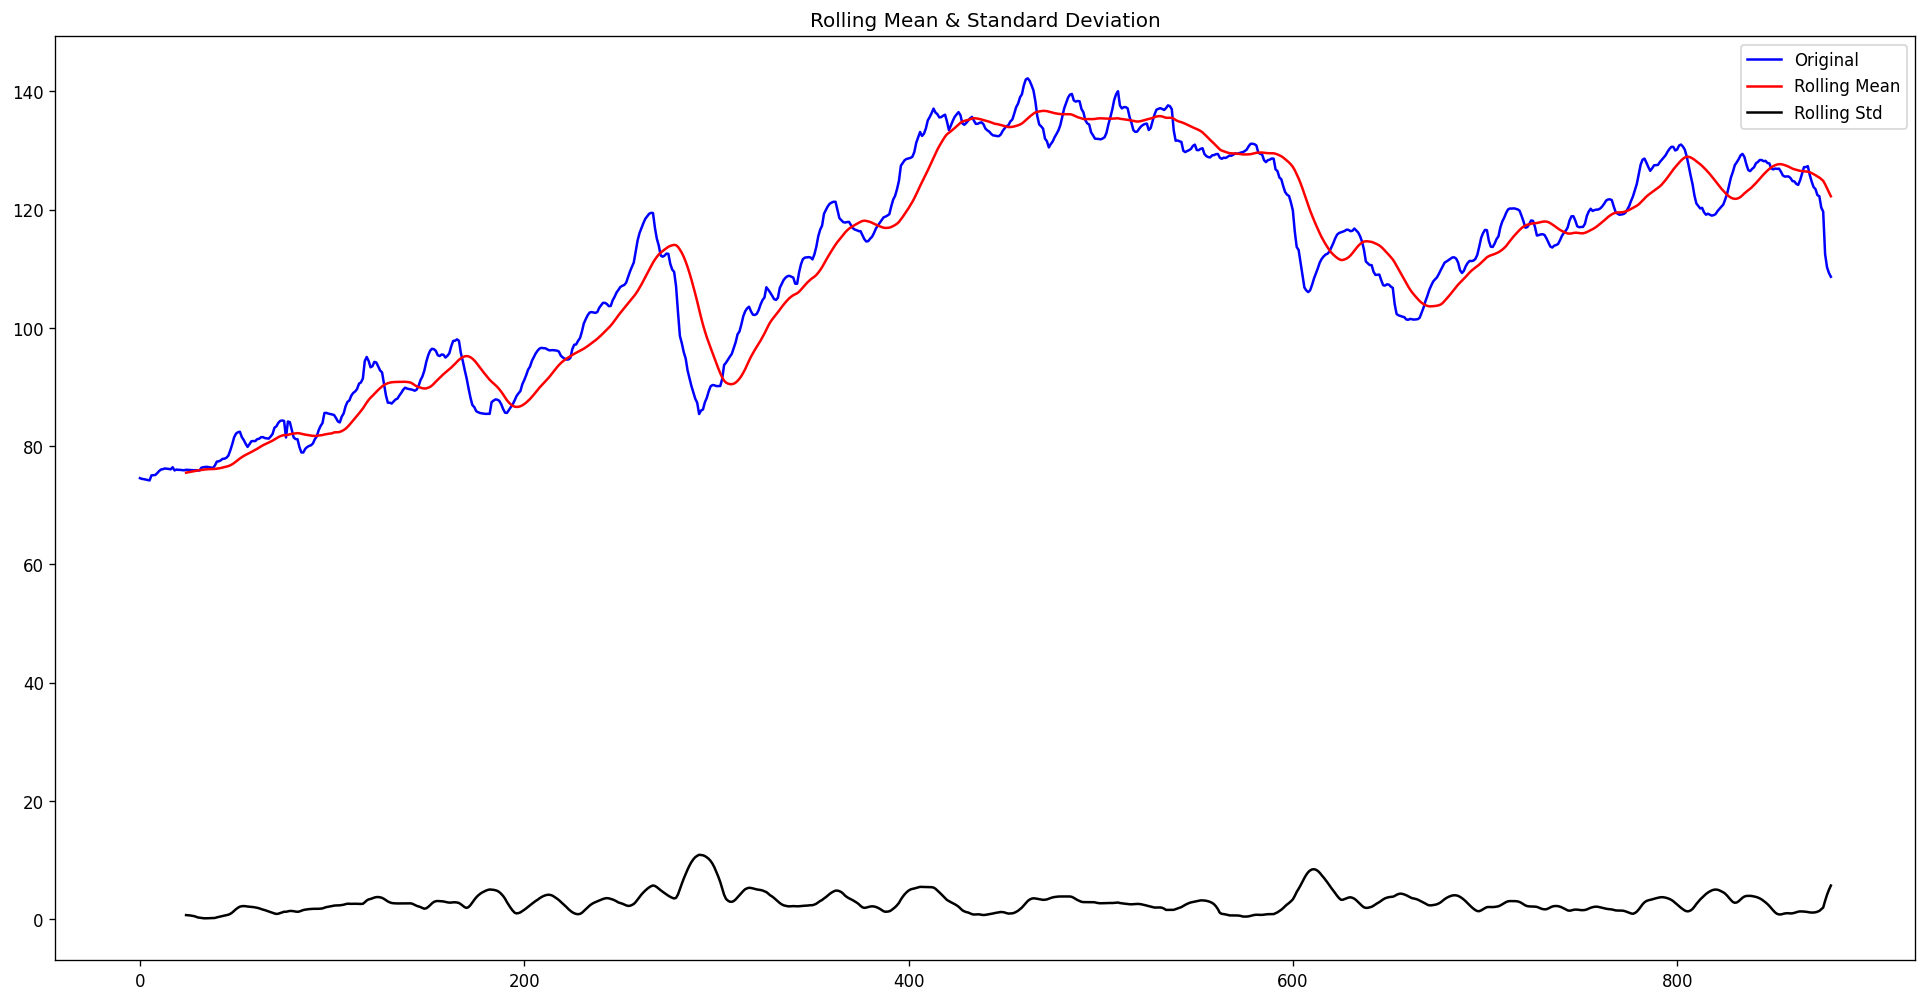

Results of Dickey-Fuller Test:
Test Statistic                  -2.261376
p-value                          0.184728
#Lags Used                       4.000000
Number of Observations Used    876.000000
Critical Value (1%)             -3.437837
Critical Value (5%)             -2.864845
Critical Value (10%)            -2.568530
dtype: float64


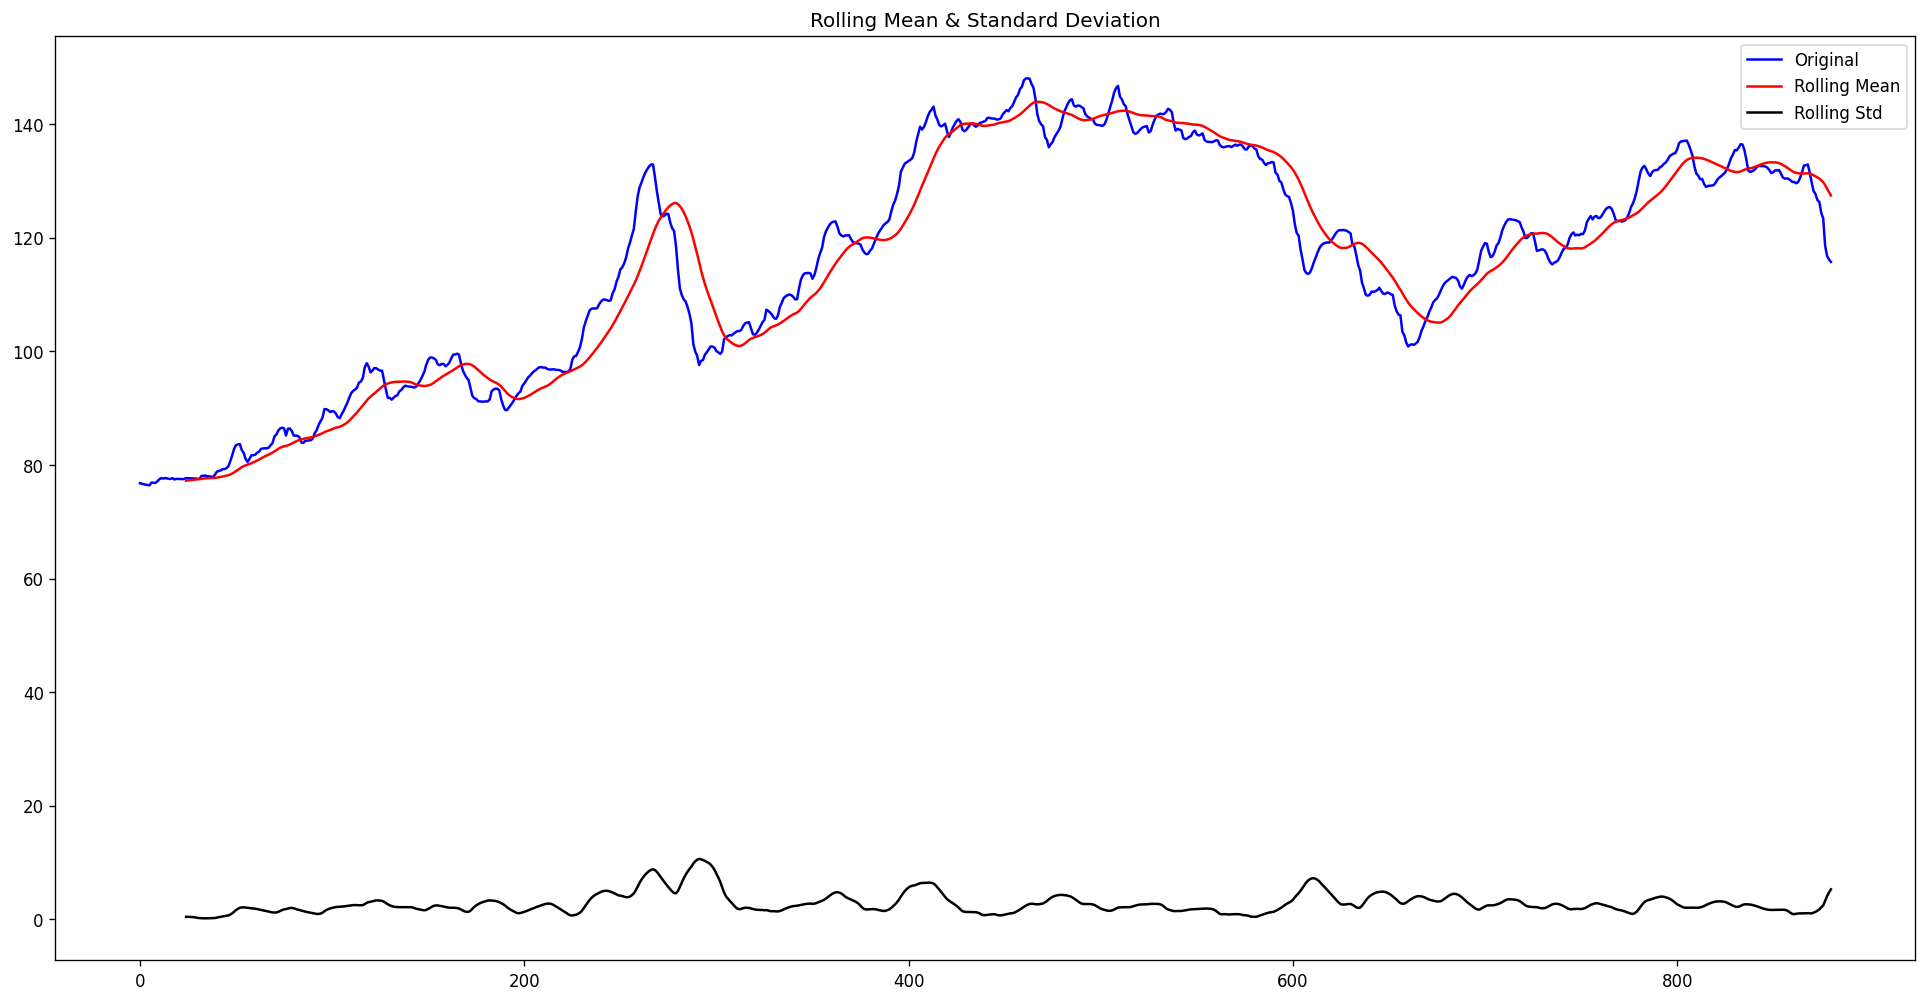

Results of Dickey-Fuller Test:
Test Statistic                  -2.158705
p-value                          0.221573
#Lags Used                       4.000000
Number of Observations Used    876.000000
Critical Value (1%)             -3.437837
Critical Value (5%)             -2.864845
Critical Value (10%)            -2.568530
dtype: float64


In [109]:
def test_stationarity(timeseries):

    # Determing rolling statistics
    rolmean = timeseries.rolling(25).mean()
    rolstd = timeseries.rolling(25).std()

    # Plot rolling statistics:
    plt.figure(figsize = (20,10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

test_stationarity(prepare_data['Petrol (USD)'])
test_stationarity(prepare_data['Diesel (USD)'])

__Interpretation:__ discuss the result, please! (10 points)

<b color="red">Gasoline and diesel in the dataset have increased over the years.</b>

***

### EXTRA POINTS -30 points 

__HELP__ Utilize the [difference strategy!](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/) if you need (for anybody who says the data is non-stationary) Otherwise, go the the model step! (10 points)

Dickey-Fuller Test: 


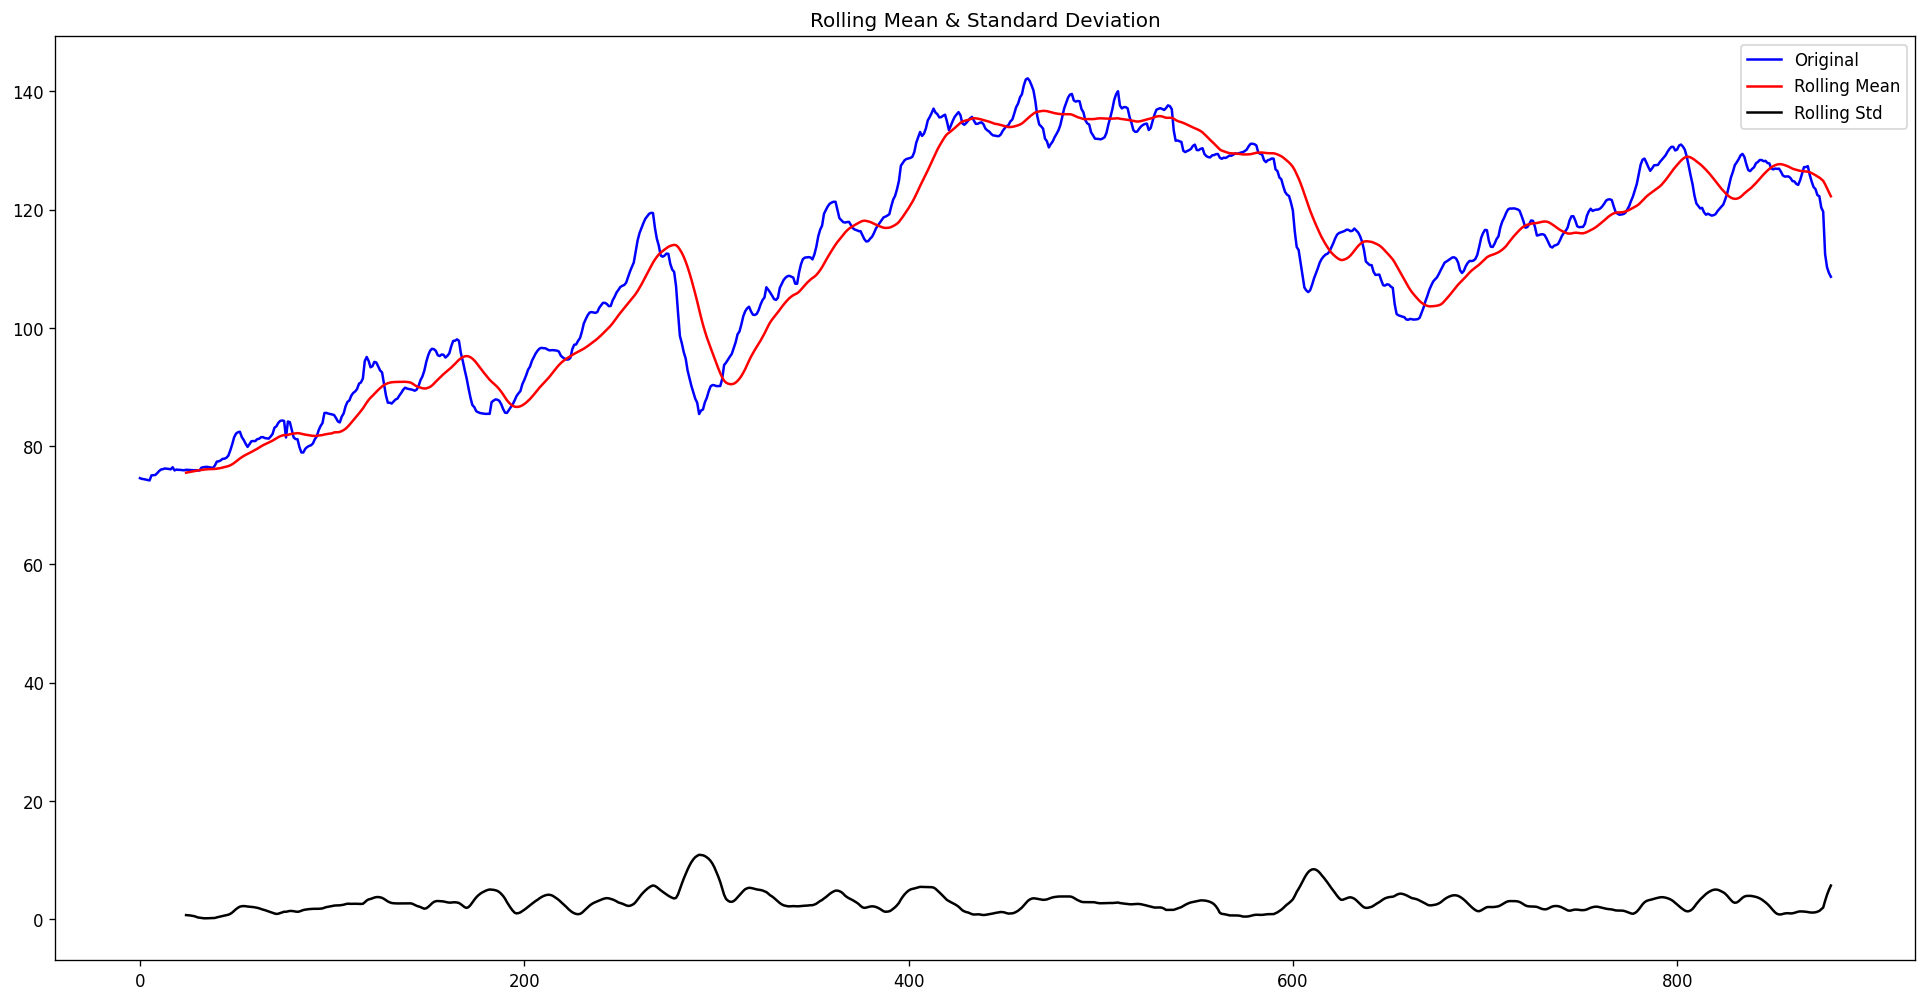

Results of Dickey-Fuller Test:
Test Statistic                  -2.261376
p-value                          0.184728
#Lags Used                       4.000000
Number of Observations Used    876.000000
Critical Value (1%)             -3.437837
Critical Value (5%)             -2.864845
Critical Value (10%)            -2.568530
dtype: float64


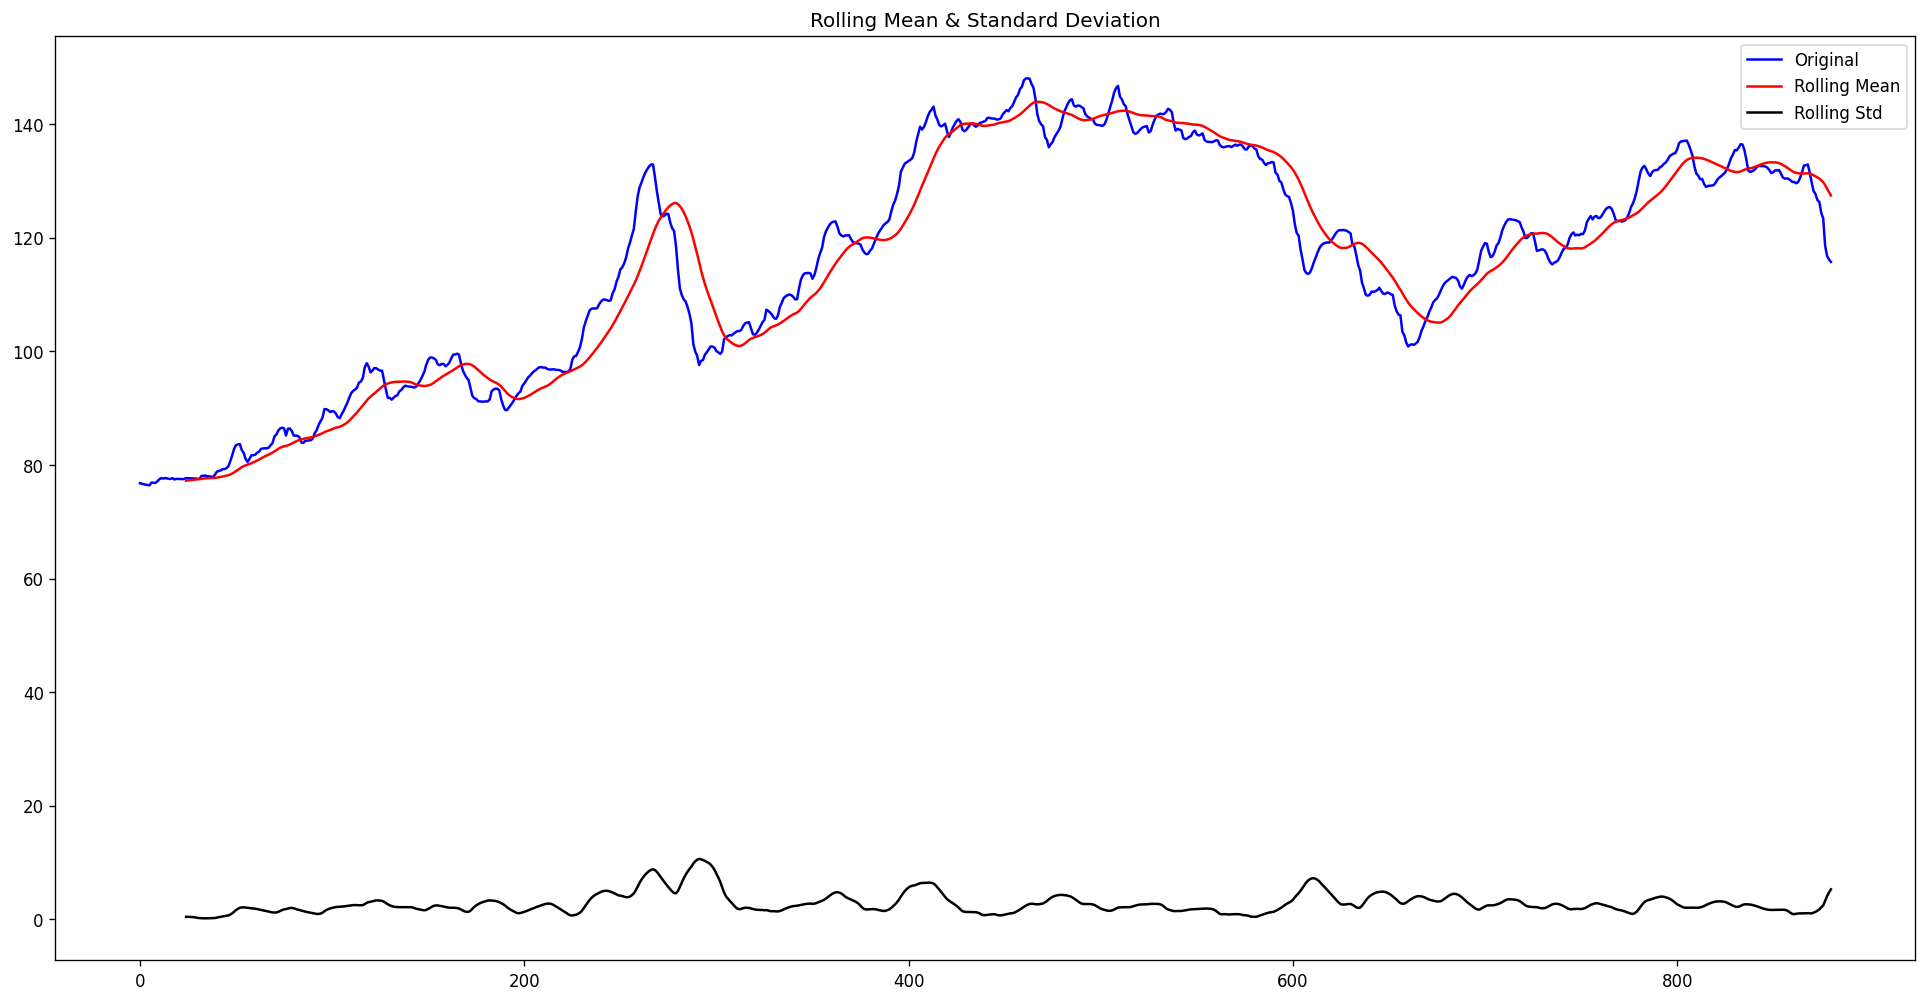

Results of Dickey-Fuller Test:
Test Statistic                  -2.158705
p-value                          0.221573
#Lags Used                       4.000000
Number of Observations Used    876.000000
Critical Value (1%)             -3.437837
Critical Value (5%)             -2.864845
Critical Value (10%)            -2.568530
dtype: float64


In [110]:
# Be sure the new data set is fully stationary: 
print('Dickey-Fuller Test: ')

from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):

    # Determing rolling statistics
    rolmean = timeseries.rolling(25).mean()
    rolstd = timeseries.rolling(25).std()

    # Plot rolling statistics:
    plt.figure(figsize = (20,10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

test_stationarity(prepare_data['Petrol (USD)'])
test_stationarity(prepare_data['Diesel (USD)'])



__Q9__ Use the arima model to predict the the price of petrol? (20 points)

Hint: You can use [Strategy in Github](https://github.com/Manishms18/Air-Passengers-Time-Series-Analysis/blob/master/Air_Passenger_with_explanations.ipynb)

In [111]:
model = sm_api.tsa.arima.ARIMA(X, order = (1, 2, 1))
arima_model = model.fit()
print(arima_model.summary())

/Users/commodore64/Desktop/YZM555/venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:           Petrol (USD)   No. Observations:                  874
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -810.882
Date:                Thu, 01 Dec 2022   AIC                           1627.763
Time:                        23:49:53   BIC                           1642.076
Sample:                             0   HQIC                          1633.239
                                - 874                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6558      0.017     37.778      0.000       0.622       0.690
ma.L1         -0.9997      0.034    -29.644      0.000      -1.066      -0.934
sigma2         0.3739      0.013     28.655      0.0

In [114]:
from sklearn.metrics import mean_squared_error

yp_train = arima_model.predict(start = 0, end = (len(X)-1))
yp_test = arima_model.predict(start = 0, end = (len(y)-1))

print("Train Data:\nMean Square Error: {}".format(mean_squared_error(X, yp_train)))
print("\nTest Data:\nMean Square Error: {}".format(mean_squared_error(y, yp_test)))

Train Data:
Mean Square Error: 8.342359900186938

Test Data:
Mean Square Error: 37.24033332570108


Optional: forecast the following year estimation!